In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/housing.csv")

In [4]:
print("\n===== Dataset Information =====")
df.info()
print("\n===== Summary Statistics =====")
print(df.describe())


===== Dataset Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

===== Summary Statistics =====
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           

In [6]:
print("\n===== First 5 Rows of the Dataset =====")
print(df.head())


===== First 5 Rows of the Dataset =====
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [8]:
print("===== Missing Values in Each Column =====")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print(missing_values)

===== Missing Values in Each Column =====
total_bedrooms    207
dtype: int64


In [10]:
df.loc[:, 'total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [11]:
X = df[['median_income']]
y = df['median_house_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Model Coefficients:
Intercept: 44459.72916907875
Coefficient: 41933.84939381272


In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 62990.87
Mean Squared Error (MSE): 7091157771.77
Root Mean Squared Error (RMSE): 84209.01
R-squared Score (R²): 0.4589


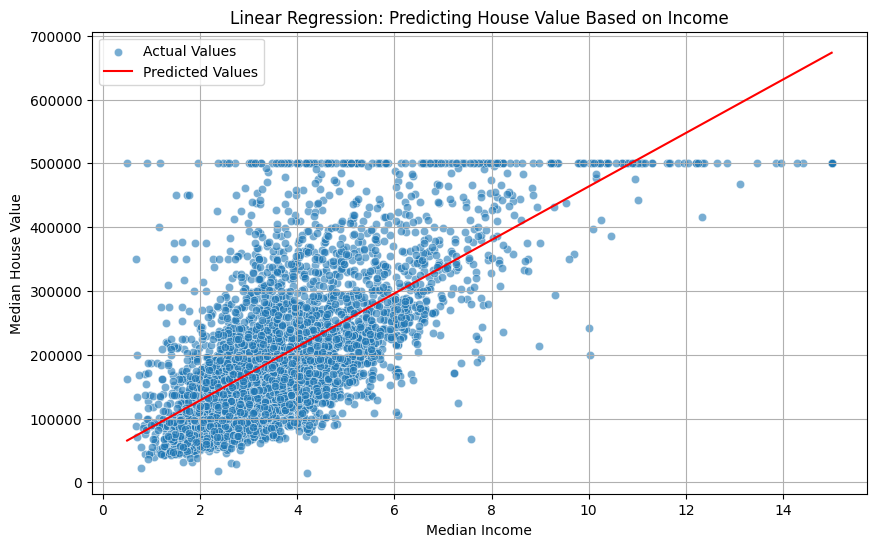

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['median_income'], y=y_test, label="Actual Values", alpha=0.6)
sns.lineplot(x=X_test['median_income'], y=y_pred, color='red', label="Predicted Values")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Predicting House Value Based on Income")
plt.legend()
plt.grid()
plt.show()

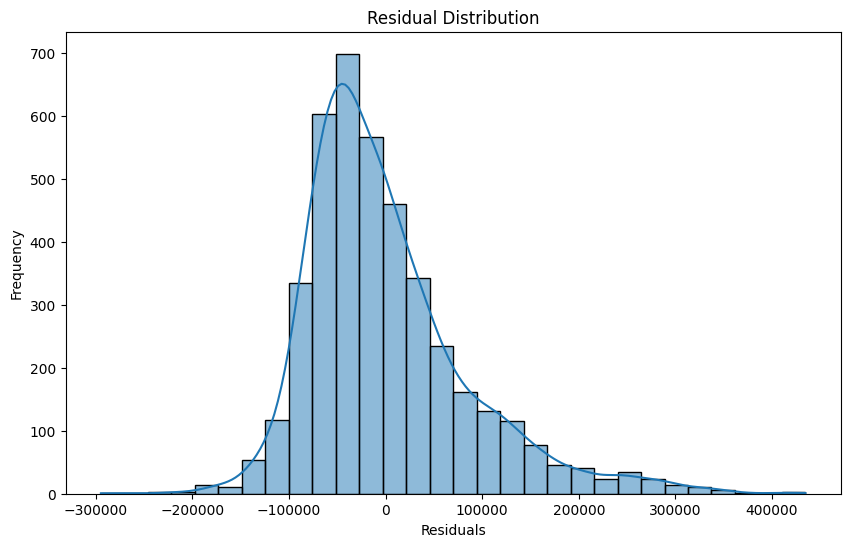

In [18]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


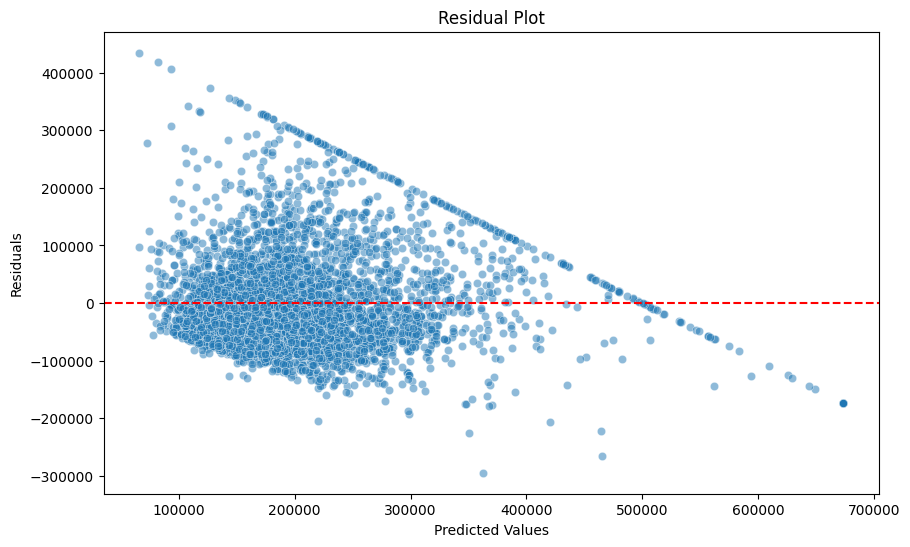

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()